# Labolatorium 1 - MOWNIT - Arytmetyka Komputerowa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Zadanie 1
#### Sumowanie liczb pojedynczej precyzji

Sumowanie proste, dodawanie po kolei do akumulatora.

In [2]:
def sum_easy (array):
    acc = np.float32(0)
    for el in array:
        acc+=el
    return acc

In [3]:
N = 10**7

def test_sum_easy (val):
    print (N, " * ", val)
    array = np.full(N, np.float32(val))
    #suma
    sum_ = N*val
    print ("Prawidłowa suma: ", sum_)
    
    #suma obliczona
    sum_error = sum_easy (array)
    print ("Obliczona suma: ", sum_error)

    #błąd bezwzględny
    absolute_error = abs (sum_ - sum_error)
    print ("Wartość błędu bezwzględnego: ", absolute_error)
    
    #błąd względny
    relative_error = absolute_error / sum_
    print ("Wartość błędu względnego: ", relative_error)

test_sum_easy (0.12345)
print ()
test_sum_easy (0.44444)
print ()
test_sum_easy (0.53125)
print ()
test_sum_easy (0.60006)
print ()
test_sum_easy (0.78789)
print ()
test_sum_easy (0.89999)
print ()

10000000  *  0.12345
Prawidłowa suma:  1234500.0
Obliczona suma:  1249511.0
Wartość błędu bezwzględnego:  15011.0
Wartość błędu względnego:  0.012159578776832726

10000000  *  0.44444
Prawidłowa suma:  4444400.0
Obliczona suma:  4852791.5
Wartość błędu bezwzględnego:  408391.5
Wartość błędu względnego:  0.09188900639006391

10000000  *  0.53125
Prawidłowa suma:  5312500.0
Obliczona suma:  5030840.5
Wartość błędu bezwzględnego:  281659.5
Wartość błędu względnego:  0.05301825882352941

10000000  *  0.60006
Prawidłowa suma:  6000600.0
Obliczona suma:  5398705.5
Wartość błędu bezwzględnego:  601894.5
Wartość błędu względnego:  0.10030571942805719

10000000  *  0.78789
Prawidłowa suma:  7878900.0
Obliczona suma:  8685216.0
Wartość błędu bezwzględnego:  806316.0
Wartość błędu względnego:  0.10233865133457716

10000000  *  0.89999
Prawidłowa suma:  8999900.0
Obliczona suma:  9719885.0
Wartość błędu bezwzględnego:  719985.0
Wartość błędu względnego:  0.07999922221358015



Dla każdej z obliczonych sum otrzymujemy spore błędy obliczeń. Błąd względny w niektórych przypadkach przekracza 10%. Podczasa dodawania od pewnego momentu do dużej liczby dodajemy bardzo małą liczbę. Pomiędzy składnikami sumy jest duża różnica w cesze. Podczas dodawania mniejsza liczba jest sprowadzana do cechy tej większej przez co jej cyfry nie mieszczą się w mantysie i tracimy wartość tej liczby. Dodawane jest tylko zaokrąglenie tej liczby. Stąd błąd względny jest bardzo duży z racji nie dokładnych obliczeń przy dużej liczbie składników (suma musi urosnąć aby dodawanie do niej liczb było niedokładne).

In [4]:
def sum_to_plot (N, val):
    count = 0
    step = 25000
    xlabel = []
    ylabel = []
    v = np.float32(val)
    acc = np.float32(0)
    for _ in range (N):
        for _ in range (step):
            acc += v
        count += step
        error = abs (count*v - acc) / (count*v)
        xlabel.append(count)
        ylabel.append(error)
    plt.figure(figsize=(15,10))
    plt.plot(xlabel, ylabel)

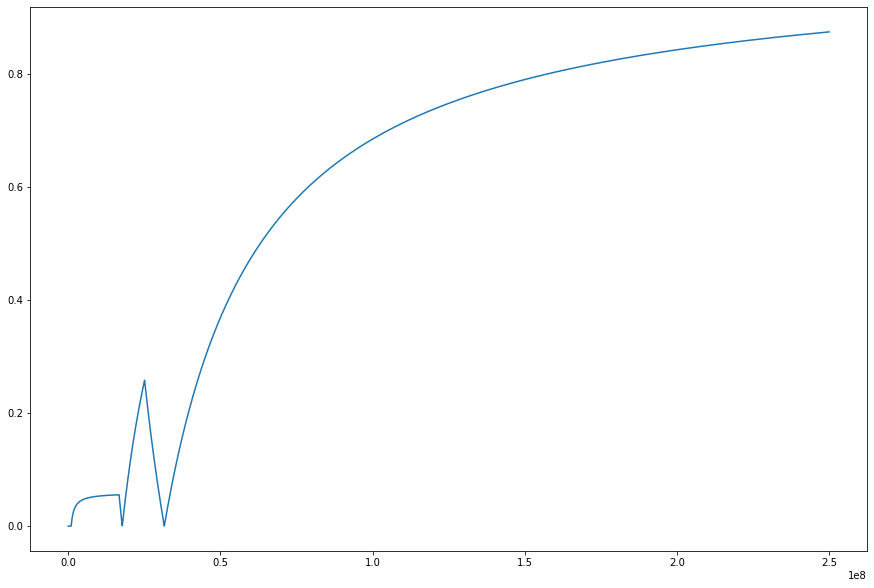

In [5]:
sum_to_plot(10000, 0.53125)

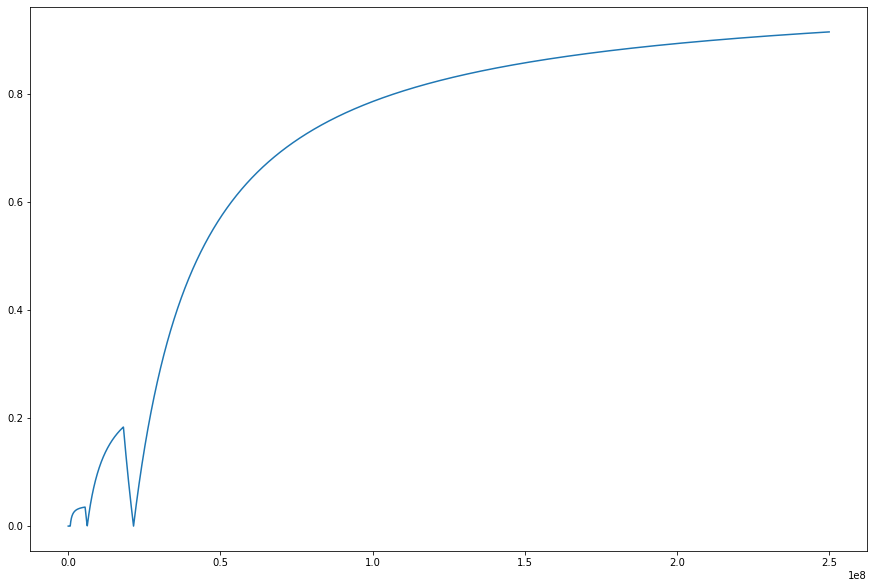

In [6]:
sum_to_plot(10000, 0.78125)

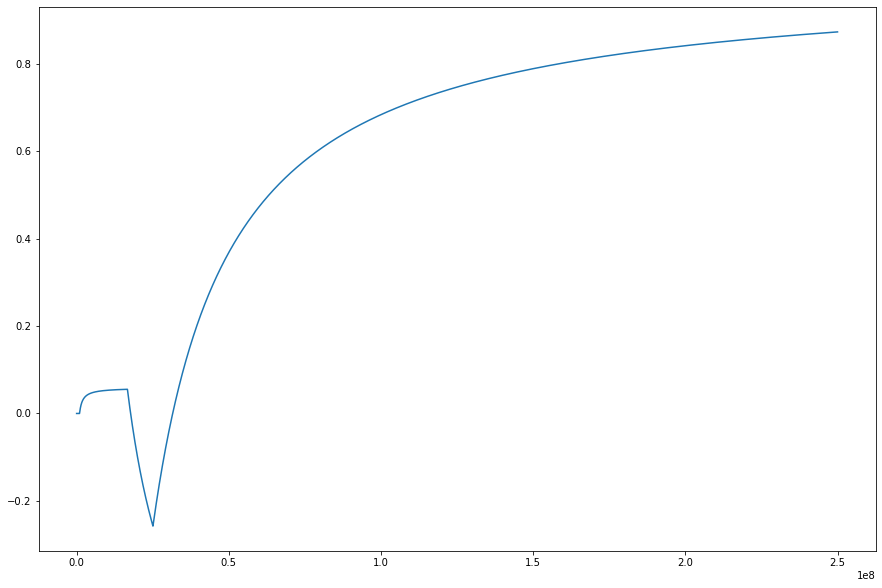

In [7]:
def sum_to_plot_without_abs (N, val):
    count = 0
    step = 25000
    xlabel = []
    ylabel = []
    v = np.float32(val)
    acc = np.float32(0)
    for _ in range (N):
        for _ in range (step):
            acc += v
        count += step
        error = (count*v - acc) / (count*v)
        xlabel.append(count)
        ylabel.append(error)
    plt.figure(figsize=(15,10))
    plt.plot(xlabel, ylabel)

sum_to_plot_without_abs(10000, 0.53125)

Od pewnej wartości argumentu funkcja szybko wzrasta i zbliża się do 1. Wynika to z faktu, że obliczona suma jest tak duża, że dodawanie kolejnych składników jej nie zmienia. Różnica w cechach jest tak duża że dodawane są zera co powoduje bardzo szybkie narastanie błędu. Natomiast "skoki na wykresie przed tym argumentem wynikają z różnych zaokrągleń składnika dodawanego. Gdy jest zaokrąglony w dół błąd bezwzględny rośnie, jednak gdy zaookrągla w górę błąd bezwzględny maleje osiągając ujemne wartości. Świetnie to widać na wykresie błędu względnego bez narzucania aby był dodatni.

Dodawanie liczb rekurencyjnie, podział na sumę lewej i prawej części tablicy.

In [8]:
def sum_r (arr):
    if len(arr) == 1:
        return arr[0]
    s = len(arr) // 2
    return sum_r(arr[:s]) + sum_r(arr[s:])

In [9]:
N = 10**7

def test_sum_r (val):
    print (N, " * ", val)
    array = np.full(N, np.float32(val))
    #suma
    sum_ = N*val
    print ("Prawidłowa suma: ", sum_)
    
    #suma obliczona
    sum_error = sum_r (array)
    print ("Obliczona suma: ", sum_error)

    #błąd bezwzględny
    absolute_error = abs (sum_ - sum_error)
    print ("Wartość błędu bezwzględnego: ", absolute_error)
    
    #błąd względny
    relative_error = absolute_error / sum_
    print ("Wartość błędu względnego: ", relative_error)

test_sum_r (0.12345)
print ()
test_sum_r (0.44444)
print ()
test_sum_r (0.53125)
print ()
test_sum_r (0.60006)
print ()
test_sum_r (0.78789)
print ()
test_sum_r (0.89999)
print ()

10000000  *  0.12345
Prawidłowa suma:  1234500.0
Obliczona suma:  1234500.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.44444
Prawidłowa suma:  4444400.0
Obliczona suma:  4444400.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.53125
Prawidłowa suma:  5312500.0
Obliczona suma:  5312500.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.60006
Prawidłowa suma:  6000600.0
Obliczona suma:  6000601.0
Wartość błędu bezwzględnego:  1.0
Wartość błędu względnego:  1.6665000166650003e-07

10000000  *  0.78789
Prawidłowa suma:  7878900.0
Obliczona suma:  7878900.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.89999
Prawidłowa suma:  8999900.0
Obliczona suma:  8999899.0
Wartość błędu bezwzględnego:  1.0
Wartość błędu względnego:  1.1111234569272992e-07



Błąd znacznie zmalał, ponieważ nie występuje sytuacja dodawania bardzo dużej liczby do bardzo małej co powoduje sytuację gdy normowanie cechy sprawia utratę cyfr znaczących. Zdarzają się przypadki, gdy obliczona suma nie jest prawidłowa, podejrzewam, że wynika to z niedoskonałości liczb zmiennoprzecinkowych, ponieważ dodawane sumy powinny nie różnić się dużo na cesze (tablica jest w miarę równo dzielona). Możemy, również zauważyć że nie da się cały czas dzielić tablicy na połówki bo 10^7 nie jest potęgą liczby 2 co powoduje że dodawane sumy różnią się między sobą co może powodować utratę cyfr znaczących podczas normowania cechy. Poniżej przedstawię sumowanie rekurencyjne z podwójną precyzją dla tablic w których wystąpiły błędy.

In [10]:
N = 10**7

def test_sum_r_64 (val):
    print (N, " * ", val)
    array = np.full(N, np.float64(val))
    #suma
    sum_ = N*val
    print ("Prawidłowa suma: ", sum_)
    
    #suma obliczona
    sum_error = sum_r (array)
    print ("Obliczona suma: ", sum_error)

    #błąd bezwzględny
    absolute_error = abs (sum_ - sum_error)
    print ("Wartość błędu bezwzględnego: ", absolute_error)
    
    #błąd względny
    relative_error = absolute_error / sum_
    print ("Wartość błędu względnego: ", relative_error)

test_sum_r_64 (0.60006)
print ()
test_sum_r_64 (0.89999)
print ()

10000000  *  0.60006
Prawidłowa suma:  6000600.0
Obliczona suma:  6000600.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.89999
Prawidłowa suma:  8999900.0
Obliczona suma:  8999900.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0



Możemy zauważyć, że zwiększenie precyzji obliczeń niweluje błąd, który pojawiał się wcześniej podczas sumowania rekurencyjnego.

In [11]:
def measure_time (function, *data):
    start_time = time.time()
    function (*data)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

In [12]:
N = 10**7

def test_time (val):
    array = np.full(N, np.float32(val))
    print (N, " * ", val)
    print ("Czas prostego sumowania: ", measure_time(sum_easy, (array)))
    print ("Czas sumowania rekurencyjnego: ", measure_time(sum_r, (array)))
    
test_time (0.12345)
print ()
test_time (0.44444)
print ()
test_time (0.53125)
print ()
test_time (0.60006)
print ()
test_time (0.78789)
print ()
test_time (0.89999)
print ()

10000000  *  0.12345
Czas prostego sumowania:  1.7894744873046875
Czas sumowania rekurencyjnego:  7.81897759437561

10000000  *  0.44444
Czas prostego sumowania:  1.7841379642486572
Czas sumowania rekurencyjnego:  7.840625762939453

10000000  *  0.53125
Czas prostego sumowania:  1.7843010425567627
Czas sumowania rekurencyjnego:  7.820346832275391

10000000  *  0.60006
Czas prostego sumowania:  1.7838068008422852
Czas sumowania rekurencyjnego:  7.858757019042969

10000000  *  0.78789
Czas prostego sumowania:  1.7800769805908203
Czas sumowania rekurencyjnego:  7.870517730712891

10000000  *  0.89999
Czas prostego sumowania:  1.7816498279571533
Czas sumowania rekurencyjnego:  7.971928358078003



Możemy zauważyć tutaj wadę rekursji, działa ona ponad 4 razy wolniej od prostego sumowania i nie jest ona wolna od błędów co pokażę niżej. Dzieje się tak z powodu nierównomiernego podziału wartości w tablicy w rekursji. Proste sumowanie jest liniową iteracją natomiast rekursja też wykona liniową liczbę operaji jednakże wprowadza narzut pamięciowy i czasowy związany z wywołaniem rekurencyjnym funkcji.

In [13]:
arr = []
sp_sum_ = 0
for i in range (1, (10**8)+1):
    arr.append(i)
    sp_sum_ += i
sp_array = np.array(arr, dtype = np.float32)

print ("Specjalnie przygotowana tablica jako ciąg arytmetyczny o wyrazie poczatkowym 1 i różnicy 1 - 10**8 wyrazów")

#suma
print ("Prawidłowa suma: ", sp_sum_)
    
#suma obliczona
sum_error = sum_r (sp_array)
print ("Obliczona suma: ", sum_error)

#błąd bezwzględny
absolute_error = abs (sp_sum_ - int(sum_error))
print ("Wartość błędu bezwzględnego: ", absolute_error)
    
#błąd względny
relative_error = absolute_error / sp_sum_
print ("Wartość błędu względnego: ", relative_error)


print ()
print ()

print ("Drobne błędy znalezione na wcześniejszym typie danych")

test_sum_r (0.60006)
print ()
test_sum_r (0.89999)
print ()
test_sum_r (0.200001)
print ()
test_sum_r (0.800001)
print ()


Specjalnie przygotowana tablica jako ciąg arytmetyczny o wyrazie poczatkowym 1 i różnicy 1 - 10**8 wyrazów
Prawidłowa suma:  5000000050000000
Obliczona suma:  5000000000000000.0
Wartość błędu bezwzględnego:  86282112
Wartość błędu względnego:  1.725642222743578e-08


Drobne błędy znalezione na wcześniejszym typie danych
10000000  *  0.60006
Prawidłowa suma:  6000600.0
Obliczona suma:  6000601.0
Wartość błędu bezwzględnego:  1.0
Wartość błędu względnego:  1.6665000166650003e-07

10000000  *  0.89999
Prawidłowa suma:  8999900.0
Obliczona suma:  8999899.0
Wartość błędu bezwzględnego:  1.0
Wartość błędu względnego:  1.1111234569272992e-07

10000000  *  0.200001
Prawidłowa suma:  2000010.0000000002
Obliczona suma:  2000010.1
Wartość błędu bezwzględnego:  0.12499999976716936
Wartość błędu względnego:  6.249968738514775e-08

10000000  *  0.800001
Prawidłowa suma:  8000010.0
Obliczona suma:  8000009.5
Wartość błędu bezwzględnego:  0.5
Wartość błędu względnego:  6.249992187509765e-08



## Zadanie 2

#### Algorytm KAHANA

In [14]:
def kahan (array):
    summ = np.float32(0)
    err = np.float32(0)
    for i in range (len(array)):
        y = array[i] - err
        temp = summ + y
        err = (temp - summ) - y
        summ = temp
    return summ

In [15]:
N = 10**7

def test_sum_kahan (val):
    print (N, " * ", val)
    array = np.full(N, np.float32(val))
    #suma
    sum_ = N*val
    print ("Prawidłowa suma: ", sum_)
    
    #suma obliczona
    sum_error = kahan (array)
    print ("Obliczona suma: ", sum_error)

    #błąd bezwzględny
    absolute_error = abs (sum_ - sum_error)
    print ("Wartość błędu bezwzględnego: ", absolute_error)
    
    #błąd względny
    relative_error = absolute_error / sum_
    print ("Wartość błędu względnego: ", relative_error)

test_sum_kahan (0.12345)
print ()
test_sum_kahan (0.44444)
print ()
test_sum_kahan (0.53125)
print ()
test_sum_kahan (0.60006)
print ()
test_sum_kahan (0.78789)
print ()
test_sum_kahan (0.89999)
print ()


print ("Specjalnie przygotowana tablica jako ciąg arytmetyczny o wyrazie poczatkowym 1 i różnicy 1 - 10**8 wyrazów")

#suma
print ("Prawidłowa suma: ", sp_sum_)
    
#suma obliczona
sum_error = kahan (sp_array)
print ("Obliczona suma: ", sum_error)

#błąd bezwzględny
absolute_error = abs (sp_sum_ - int(sum_error))
print ("Wartość błędu bezwzględnego: ", absolute_error)
    
#błąd względny
relative_error = absolute_error / sp_sum_
print ("Wartość błędu względnego: ", relative_error)

10000000  *  0.12345
Prawidłowa suma:  1234500.0
Obliczona suma:  1234500.1
Wartość błędu bezwzględnego:  0.125
Wartość błędu względnego:  1.012555690562981e-07

10000000  *  0.44444
Prawidłowa suma:  4444400.0
Obliczona suma:  4444400.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.53125
Prawidłowa suma:  5312500.0
Obliczona suma:  5312500.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.60006
Prawidłowa suma:  6000600.0
Obliczona suma:  6000600.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.78789
Prawidłowa suma:  7878900.0
Obliczona suma:  7878900.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

10000000  *  0.89999
Prawidłowa suma:  8999900.0
Obliczona suma:  8999900.0
Wartość błędu bezwzględnego:  0.0
Wartość błędu względnego:  0.0

Specjalnie przygotowana tablica jako ciąg arytmetyczny o wyrazie poczatkowym 1 i różnicy 1 - 10**8 wyrazów
Prawidłowa suma:  500

Algorytm Kahana w porównaniu do pozostałych jest najlepszy. Działa szybciej od rekurencyjnego oraz jest bardziej dokładny. Działa dłużej niż prose sumowanie, jednakże proste sumowanie jest na tyle niedokładne, że nie nadaje się do uniwersalnego stosowania. Ważną częścią algorytmu Kahana jest zmienna 'err'. Odpowiada ona za obliczenie wartości która nie została dodana do sumy z powodu obcięcia podczas normowania cechy. Są to utracone bity. Wartość ta jest odejmowana od kolejnegoi składnika w kolejnej iteracji. Dzięki temu uzyskujemy szybki, liniowy, iteracyjny algorytm, który dba o nie gubienie cyfr znaczących. Jednakże nie jest to idealne rozwiązanie, są sytuacje gdy on też nie zwraca idealnej sumy. Jednakże błędy są bardzo nieiwielkie.

In [16]:
N = 10**7

def test_time_kahan (val):
    array = np.full(N, np.float32(val))
    print (N, " * ", val)
    print ("Czas sumowania algorytmem Kahana: ", measure_time(kahan, (array)))
    print ("Czas sumowania rekurencyjnego: ", measure_time(sum_r, (array)))
    
test_time_kahan (0.12345)
print ()
test_time_kahan (0.44444)
print ()
test_time_kahan (0.53125)
print ()
test_time_kahan (0.60006)
print ()
test_time_kahan (0.78789)
print ()
test_time_kahan (0.89999)
print ()

10000000  *  0.12345
Czas sumowania algorytmem Kahana:  4.893996238708496
Czas sumowania rekurencyjnego:  7.941883087158203

10000000  *  0.44444
Czas sumowania algorytmem Kahana:  4.8711981773376465
Czas sumowania rekurencyjnego:  7.863996267318726

10000000  *  0.53125
Czas sumowania algorytmem Kahana:  5.085727214813232
Czas sumowania rekurencyjnego:  8.48323941230774

10000000  *  0.60006
Czas sumowania algorytmem Kahana:  4.98528265953064
Czas sumowania rekurencyjnego:  8.446032762527466

10000000  *  0.78789
Czas sumowania algorytmem Kahana:  5.092629671096802
Czas sumowania rekurencyjnego:  7.861287355422974

10000000  *  0.89999
Czas sumowania algorytmem Kahana:  4.957585573196411
Czas sumowania rekurencyjnego:  7.932579517364502



Algorytm Kahana jest ok. 1.5 raza szybszy od algorytmu rekurencyjnego. Wynika to z faktu, że jest liniowy i iteracyjny. Działa jednak wolniej od prostego sumowania, ponieważ stała przy n w złożoności jest większa.

## Zadanie 3

In [17]:
def dzeta_1ton (s, n, data_type):
    result = data_type(0)
    for k in range (1, n+1):
        result += 1/pow (k, s)
    return result

def dzeta_nto1 (s, n, data_type):
    result = data_type(0)
    for k in range (n, 0, -1):
        result += 1/pow (k, s)
    return result


def eta_1ton (s, n, data_type):
    result = data_type(0)
    for k in range (1, n+1):
        if k % 2 == 0:
            result -= 1/pow (k, s)
        else:
            result += 1/pow (k, s)
    return result

def eta_nto1 (s, n, data_type):
    result = data_type(0)
    for k in range (n, 0, -1):
        if k % 2 == 0:
            result -= 1/pow (k, s)
        else:
            result += 1/pow (k, s)
    return result

In [18]:
def test_dzeta (s, n):
    print ("Funkcja dzeta dla s:", s, "i n:", n, "dla pojedynczej precyzji i sumowania w przód: ")
    print (dzeta_1ton (s, n, np.float32))
    print ("Funkcja dzeta dla s:", s, "i n:", n, "dla pojedynczej precyzji i sumowania w tył: ")
    print (dzeta_nto1 (s, n, np.float32))
    print ("Funkcja dzeta dla s:", s, "i n:", n, "dla podwójnej precyzji i sumowania w przód: ")
    print (dzeta_1ton (s, n, np.float64))
    print ("Funkcja dzeta dla s:", s, "i n:", n, "dla podwójnej precyzji i sumowania w tył: ")
    print (dzeta_nto1 (s, n, np.float64))
    print ()
    
def test_eta (s, n):
    print ("Funkcja eta dla s:", s, "i n:", n, "dla pojedynczej precyzji i sumowania w przód: ")
    print (eta_1ton (s, n, np.float32))
    print ("Funkcja eta dla s:", s, "i n:", n, "dla pojedynczej precyzji i sumowania w tył: ")
    print (eta_nto1 (s, n, np.float32))
    print ("Funkcja eta dla s:", s, "i n:", n, "dla podwójnej precyzji i sumowania w przód: ")
    print (eta_1ton (s, n, np.float64))
    print ("Funkcja eta dla s:", s, "i n:", n, "dla podwójnej precyzji i sumowania w tył: ")
    print (eta_nto1 (s, n, np.float64))
    print ()

In [19]:
S = [2, 3.6667, 5, 7.2, 10]
N = [50, 100, 200, 500, 1000]

for s in S:
    for n in N:
        test_dzeta (s,n)

Funkcja dzeta dla s: 2 i n: 50 dla pojedynczej precyzji i sumowania w przód: 
1.625132733621529
Funkcja dzeta dla s: 2 i n: 50 dla pojedynczej precyzji i sumowania w tył: 
1.6251327336215293
Funkcja dzeta dla s: 2 i n: 50 dla podwójnej precyzji i sumowania w przód: 
1.625132733621529
Funkcja dzeta dla s: 2 i n: 50 dla podwójnej precyzji i sumowania w tył: 
1.6251327336215293

Funkcja dzeta dla s: 2 i n: 100 dla pojedynczej precyzji i sumowania w przód: 
1.6349839001848923
Funkcja dzeta dla s: 2 i n: 100 dla pojedynczej precyzji i sumowania w tył: 
1.634983900184893
Funkcja dzeta dla s: 2 i n: 100 dla podwójnej precyzji i sumowania w przód: 
1.6349839001848923
Funkcja dzeta dla s: 2 i n: 100 dla podwójnej precyzji i sumowania w tył: 
1.634983900184893

Funkcja dzeta dla s: 2 i n: 200 dla pojedynczej precyzji i sumowania w przód: 
1.6399465460149971
Funkcja dzeta dla s: 2 i n: 200 dla pojedynczej precyzji i sumowania w tył: 
1.6399465460149973
Funkcja dzeta dla s: 2 i n: 200 dla podwójne

In [20]:
for s in S:
    for n in N:
        test_eta (s,n)

Funkcja eta dla s: 2 i n: 50 dla pojedynczej precyzji i sumowania w przód: 
0.8222710318260295
Funkcja eta dla s: 2 i n: 50 dla pojedynczej precyzji i sumowania w tył: 
0.8222710318260289
Funkcja eta dla s: 2 i n: 50 dla podwójnej precyzji i sumowania w przód: 
0.8222710318260295
Funkcja eta dla s: 2 i n: 50 dla podwójnej precyzji i sumowania w tył: 
0.8222710318260289

Funkcja eta dla s: 2 i n: 100 dla pojedynczej precyzji i sumowania w przód: 
0.8224175333741286
Funkcja eta dla s: 2 i n: 100 dla pojedynczej precyzji i sumowania w tył: 
0.8224175333741282
Funkcja eta dla s: 2 i n: 100 dla podwójnej precyzji i sumowania w przód: 
0.8224175333741286
Funkcja eta dla s: 2 i n: 100 dla podwójnej precyzji i sumowania w tył: 
0.8224175333741282

Funkcja eta dla s: 2 i n: 200 dla pojedynczej precyzji i sumowania w przód: 
0.822454595922551
Funkcja eta dla s: 2 i n: 200 dla pojedynczej precyzji i sumowania w tył: 
0.8224545959225509
Funkcja eta dla s: 2 i n: 200 dla podwójnej precyzji i sumowa

Różnice w wynikach obserwujemy tylko w rozróżnieniu czy sumujemy w przód czy w tył. Zastosowanie podwójnej przecyzji nie zmienia wyniku. Sumowanie od n do 1 jest dokładniejsze, wynika to z oszacowania niepewności (poniżej). Sumujemy od małych wartości do dużych dzięki temu podstawa do naliczania błędu rośnie powoli, w przeciwnym wypadku podstawa ta od razu jest duża i cały czas rośnie.

Zakładamy, że |x+y| < |y+z|

Szacujemy błędy względne dwóch sposobów sumowania, skoro uzyskana suma jest taka sama to wystarczy porównać błędy bezwzględne.

1) fl(fl(x+y) + z)

błąd_bezwględny_1 = |fl(fl(x+y) + z) - (x+y+z)| <= |(1+e) * (fl(x+y) + z) - (x+y+z)| <= |(1+e) * ((1+e)*(x+y) + z) - (x+y+z)| = |e(x+y) + e(x+y+z) + e^2(x+y)|

2) fl(x + fl(y+z))

błąd_bezwględny_2 = |fl(x + fl(y+z)) - (x+y+z)| <= |(1+e) * (x + fl(y+z)) - (x+y+z)| <= |(1+e) * ((1+e)*(y+z) + x) - (x+y+z)| = |e(y+z) + e(x+y+z) + e^2(y+z)|

A więc jesli skorzystamy z założenia to otrzymujemy, że

błąd_bezwględny_1 < błąd_bezwględny_2

## Zadanie 4

#### Odwzorowanie logistyczne

In [21]:
def fun (x0, r, n, data_type = np.float64):
    x0 = data_type (x0)
    r = data_type (r)
    for i in range (n):
        x0 = r * x0 * (1 - x0)
    return x0

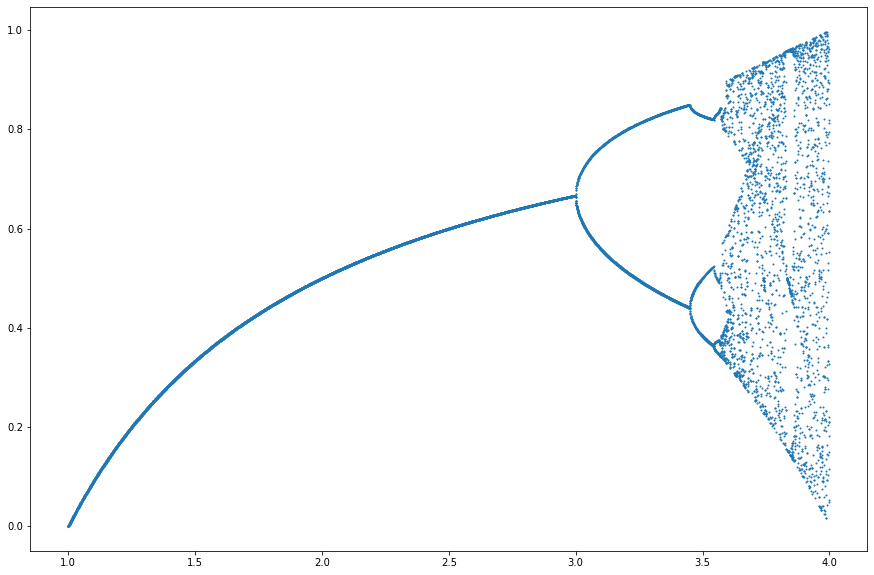

In [22]:
def make_plot ():
    x_plot = []
    y_plot = []
    for r in np.arange (1, 4, 0.001):
        for x0 in [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95]:
            x_plot.append(r)
            val = fun (x0, r, 10000)
            y_plot.append(val)
    plt.figure(figsize=(15,10))
    plt.scatter(x_plot, y_plot, s=1)
    
make_plot()

Możemy zauważyć, że dla r<3 szereg jest zawsze zbieżny do pewnej wartości niezależnie od punktu x0. Dla r z przedziału (3, ~3.4) szereg ten zbiega do jednej z dwóch wartości w zależności od x0. Dla coraz większych r punktów możliwej zbieżności jest coraz więcej. Od pewnej wartości r szereg jest rozbieżny jednak możemy zauważyć że wartości osiągane po wykonaniu dużej ilości iteracji mieszczą się w pewnym przedziale zależnym od r.

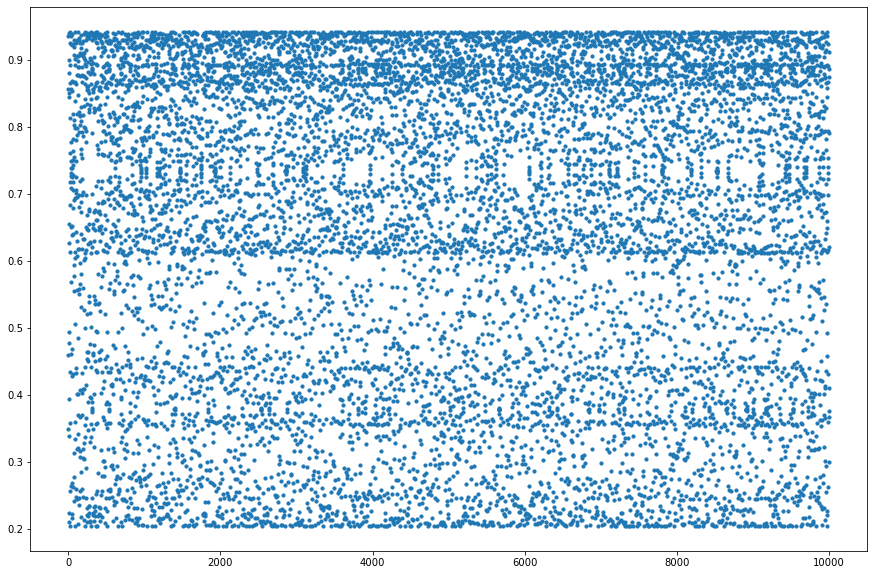

In [23]:
x_plot = []
y_plot = []
r = np.float32(3.77)
x0 = np.float32(0.35)
x_plot.append(0)
y_plot.append(x0)
for n in range (1, 10000):
    x0 = r * x0 * (1 - x0)
    x_plot.append(n)
    y_plot.append(x0)
plt.figure(figsize=(15,10))
plt.scatter(x_plot, y_plot, s=10)

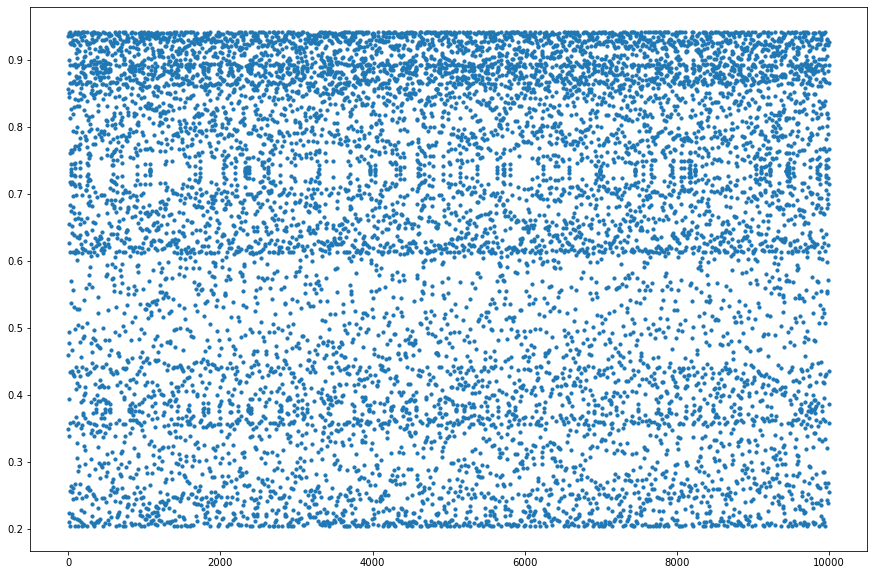

In [24]:
x_plot = []
y_plot = []
r = np.float64(3.77)
x0 = np.float64(0.35)
x_plot.append(0)
y_plot.append(x0)
for n in range (1, 10000):
    x0 = r * x0 * (1 - x0)
    x_plot.append(n)
    y_plot.append(x0)
plt.figure(figsize=(15,10))
plt.scatter(x_plot, y_plot, s=10)

Wartości w kolejnych iteracjach zmieniają się ale cały czas mieszczą się w przedziale który zależy od r. Widzimy, że niektóre wartości pojawiają się częsciej od innych.

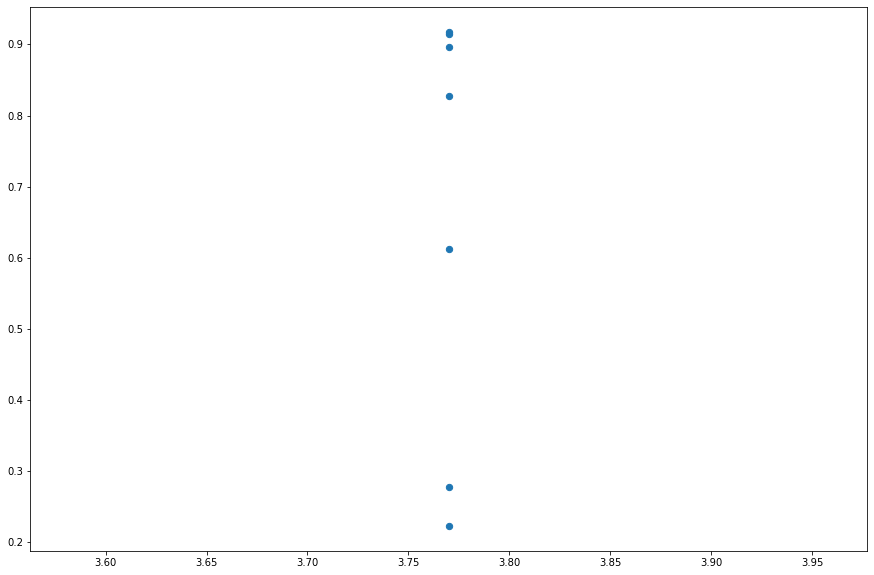

In [25]:
x_plot = []
y_plot = []
r = 3.77
for x0 in [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95]:
    x_plot.append(r)
    val = fun (x0, r, 1000, np.float32)
    y_plot.append(val)
plt.figure(figsize=(15,10))
plt.scatter(x_plot, y_plot, s=40)

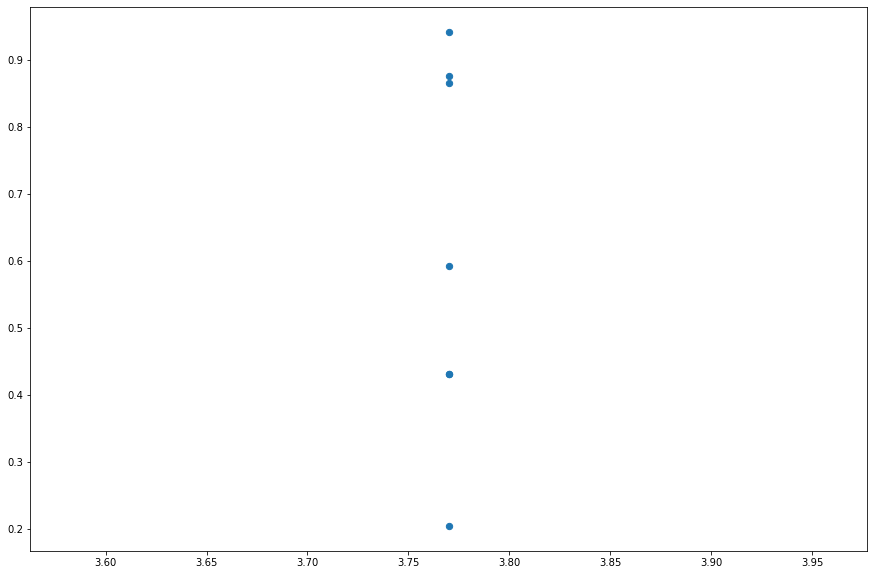

In [26]:
x_plot = []
y_plot = []
r = 3.77
for x0 in [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95]:
    x_plot.append(r)
    val = fun (x0, r, 1000, np.float64)
    y_plot.append(val)
plt.figure(figsize=(15,10))
plt.scatter(x_plot, y_plot, s=40)

Wartości po wykonaniu dużej ilości iteracji punktów są różne w zależności od precyzji obliczeń. Precyzja wpływa na kolejne wartości szeregu, przez co w kolejnych iteracjach uzyskujemy inne wyniki co po wykonaniu wielu iteracji jest widoczne poprzez uzyskanie całkowicie innych rezultatów.

In [27]:
def fun_c (x0, data_type = np.float32):
    epsilon = 10**-7
    x0 = data_type (x0)
    r = data_type (4)
    count = 0
    while (x0>epsilon or x0<(-1)*epsilon):
        x0 = r * x0 * (1 - x0)
        count += 1
    return count

for x0 in [0, 0.05, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.95, 1]:
    count = fun_c (x0)
    print ("Dla x0 równego", x0, "zero osiągnięto dla n wynoszącego", count)

Dla x0 równego 0 zero osiągnięto dla n wynoszącego 0
Dla x0 równego 0.05 zero osiągnięto dla n wynoszącego 1519
Dla x0 równego 0.15 zero osiągnięto dla n wynoszącego 31524
Dla x0 równego 0.2 zero osiągnięto dla n wynoszącego 2577
Dla x0 równego 0.3 zero osiągnięto dla n wynoszącego 18340
Dla x0 równego 0.4 zero osiągnięto dla n wynoszącego 3076
Dla x0 równego 0.5 zero osiągnięto dla n wynoszącego 2
Dla x0 równego 0.6 zero osiągnięto dla n wynoszącego 1227
Dla x0 równego 0.7 zero osiągnięto dla n wynoszącego 18340
Dla x0 równego 0.8 zero osiągnięto dla n wynoszącego 21694
Dla x0 równego 0.85 zero osiągnięto dla n wynoszącego 7107
Dla x0 równego 0.95 zero osiągnięto dla n wynoszącego 16767
Dla x0 równego 1 zero osiągnięto dla n wynoszącego 1


Ilość iteracji potrzebna do osiągnięcia zera jest różna w zależności od x0. Najmniejsze wartości są dla x0 = 0, 1, 0.5. Możemy zauważyć że dla wartości bliskich 0.25 i 0.75 liczba iteracji wzrasta. Wynika to z faktu że dla tych wartości nigdy nie osiągniemy 0. W pozostałych przypadkach różne są wartości potrzebnych iteracji. Obserwujemy również zwiększenie w okolicy 0.15 i 0.9, prawdopodobnie oznacza to że tam też w pobliżu występuje liczba dla której iteracje się zapętlają.